<a href="https://colab.research.google.com/github/Ebl14/senales_y_sistemas/blob/main/Copia_de_parcial_1se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Se tiene un microprocesador de 5 bits con entrada analoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalizacion para la señal:  x(t) = 20 sin(7t−π/2)−3 cos(5t)+2 cos(10t). Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python, incluyendo al menos dos periodos de la senal estudiada

la suma de las señales da cuasioperiodica, teorema de nyquit

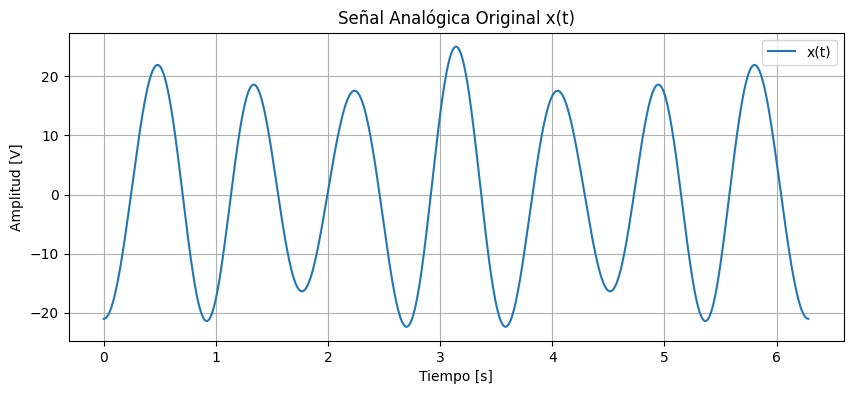

Rango original de x(t): -22.34 V a 24.99 V


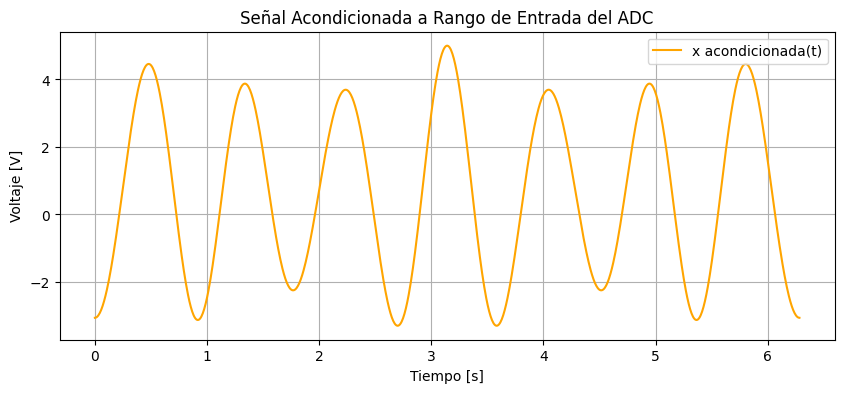

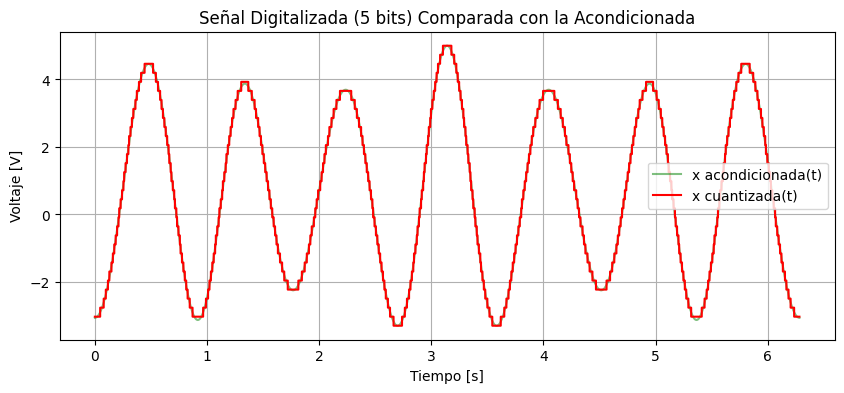

In [ ]:
# Importamos las librerías necesarias
import numpy as np #importación para operaciones númericas
import matplotlib.pyplot as plt #importación para graficar

# 1. Definimos la señal original x(t)
# Esta función representa la señal analógica antes del acondicionamiento
def x(t):
    return 20 * np.sin(7 * t - np.pi / 2) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)# se crea una señal compuesta por 3 componentes
    # 20*sin(7t - π/2): Onda seno de amplitud 20, frecuencia 7 rad/s y desfase -π/2
    # -3*cos(5t): Onda coseno de amplitud 3 (invertida) y frecuencia 5 rad/s
    # 2*cos(10t): Onda coseno de amplitud 2 y frecuencia 10 rad/s

# 2. Creamos el vector de tiempo: dos periodos de la frecuencia fundamental
# La frecuencia fundamental se obtiene del menor múltiplo común de las frecuencias 7, 5 y 10 rad/s
# El período fundamental será 2π / mcd(7, 5, 10) = 2π
T = 2 * np.pi
t = np.linspace(0, T, 1000) #se generan una secuencia ordenanda de numeros entre el 0 y el T la cantidad de estos esta definida por el numero final en este caso es 1000  # vector de tiempo para dos períodos con buena resolución, 0 y T es el rango de
# T: Período fundamental calculado como 2π (máximo común divisor de las frecuencias)

# t: Vector de tiempo que cubre dos períodos con 1000 puntos para buena resolución

# 3. Evaluamos la señal
xt = x(t) #es el puente entre la señal analógica (matemática) y su representación digital

# 4. Graficamos la señal original
plt.figure(figsize=(10, 4)) # Crea una figura de 10 pulgadas de ancho x 4 de alto
plt.plot(t, xt, label='x(t)') # Grafica la señal original
plt.title('Señal Analógica Original x(t)') # Título del gráfico
plt.xlabel('Tiempo [s]') # Etiqueta del eje x
plt.ylabel('Amplitud [V]') # Etiqueta del eje y
plt.grid(True) # Habilita la cuadrícula
plt.legend() # Muestra la leyenda
plt.show() # Muestra el gráfico

# 5. Calculamos los valores máximo y mínimo para diseñar el acondicionador
x_max = np.max(xt) # Encuentra el valor máximo de la señal
x_min = np.min(xt) # Encuentra el valor mínimo de la señal
print(f"Rango original de x(t): {x_min:.2f} V a {x_max:.2f} V") # Imprime el rango dinámico

# 6. Acondicionamiento: mapeamos de [x_min, x_max] a [-3.3, 5]
# La fórmula es: x_scaled = (x - x_min) * (target_max - target_min)/(x_max - x_min) + target_min

target_min = -3.3 # Valor mínimo objetivo para el acondicionamiento
target_max = 5 # Valor máximo objetivo para el acondicionamiento

# Función para escalar la señal
def acondicionar(x_signal): # Escala linealmente la señal
    return (x_signal - x_min) * (target_max - target_min) / (x_max - x_min) + target_min

x_acond = acondicionar(xt) # Señal acondicionada en el nuevo rango de voltaje

# 7. Graficamos la señal acondicionada
plt.figure(figsize=(10, 4)) # Crea nueva figura
plt.plot(t, x_acond, label='x acondicionada(t)', color='orange') # Grafica señal acondicionada
plt.title('Señal Acondicionada a Rango de Entrada del ADC') # Título
plt.xlabel('Tiempo [s]') # Etiqueta eje x
plt.ylabel('Voltaje [V]') # Etiqueta eje y
plt.grid(True) # Cuadrícula
plt.legend() # Leyenda
plt.show() # Muestra gráfico

# 8. Digitalización (Cuantización): 5 bits → 2^5 = 32 niveles
n_bits = 5 # Número de bits del ADC
niveles = 2 ** n_bits # Calcula el número de niveles de cuantización (32 para 5 bits)
resolucion = (target_max - target_min) / (niveles - 1) # Calcula la resolución del ADC
# Cuantizamos la señal acondicionada
x_digital = np.round((x_acond - target_min) / resolucion)# Aplica redondeo para cuantizar

# 9. Reconstruimos la señal digital (niveles de tensión)
x_cuantizada = x_digital * resolucion + target_min # Convierte niveles digitales a voltajes

# 10. Graficamos señal digitalizada vs acondicionada
plt.figure(figsize=(10, 4)) # Crea nueva figura
plt.plot(t, x_acond, label='x acondicionada(t)', color='green', alpha=0.5) # Señal analógica
plt.step(t, x_cuantizada, label='x cuantizada(t)', color='red', where='mid') # Señal digital
plt.title('Señal Digitalizada (5 bits) Comparada con la Acondicionada') # Título
plt.xlabel('Tiempo [s]') # Etiqueta eje x
plt.ylabel('Voltaje [V]') # Etiqueta eje y
plt.grid(True) # Cuadrícula
plt.legend() # Leyenda
plt.show() # Muestra gráfico




2. Cual es la señal obtenida en tiempo discreto al utilizar
un conversor analogo digital con frecuencia de muestreo
de 5kHz, aplicado a la señal  x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion
del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor
adecuado para la señal estudiada.

esa frecuencia de muestreo no respecta el teorema de nysquit, es cuasiperiodica

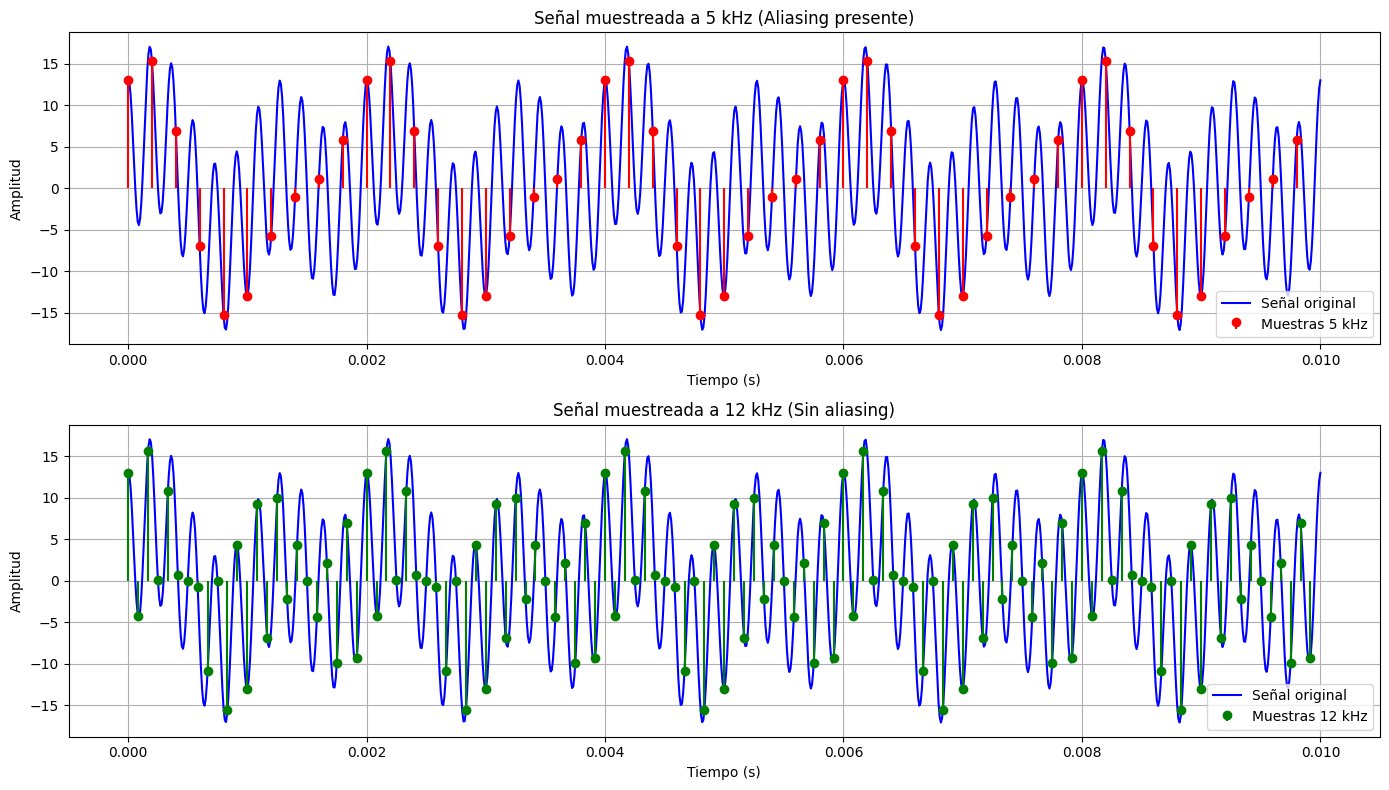

In [ ]:
# ===========================================
# ANÁLISIS DE MUESTREO Y SEÑAL COMPUESTA EN DOMINIO DEL TIEMPO
# ===========================================

# Importación de librerías necesarias
import numpy as np                              # NumPy para manejo de vectores y operaciones matemáticas
import matplotlib.pyplot as plt                 # Matplotlib para graficar señales

# ===========================================
# PARTE 1: Generación de señal continua
# ===========================================

# Frecuencia angular base (en radianes/segundo)
vm = 1000 * np.pi                               # vm representa 1000π rad/s

# Periodo fundamental (en segundos)
T = 2 * np.pi / vm                              # T = 2π / ω = periodo de la señal base

# Vector de tiempo continuo para graficar la señal continua
t = np.linspace(0, 0.01, 1000)                  # Tiempo desde 0 hasta 0.01 s, alta resolución

# Definición de la señal compuesta x(t)
x_t = (
    3 * np.cos(1000 * np.pi * t) +              # 500 Hz componente
    5 * np.sin(2000 * np.pi * t) +              # 1000 Hz componente
    10 * np.cos(11000 * np.pi * t)              # 5500 Hz componente
)

# ===========================================
# PARTE 2: Muestreo con fs = 5 kHz (con aliasing)
# ===========================================

fs1 = 5000                                      # Frecuencia de muestreo en Hz
Ts1 = 1 / fs1                                   # Periodo de muestreo
n1 = np.arange(0, 0.01, Ts1)                    # Instantes de muestreo
t1 = n1                                         # Alias para claridad en el tiempo discreto

x_n1 = (
    3 * np.cos(1000 * np.pi * t1) +
    5 * np.sin(2000 * np.pi * t1) +
    10 * np.cos(11000 * np.pi * t1)
)

# ===========================================
# PARTE 3: Muestreo con fs = 12 kHz (sin aliasing)
# ===========================================

fs2 = 12000                                     # Frecuencia de muestreo en Hz
Ts2 = 1 / fs2                                   # Periodo de muestreo
n2 = np.arange(0, 0.01, Ts2)                    # Instantes de muestreo
t2 = n2                                         # Alias para claridad en el tiempo discreto

x_n2 = (
    3 * np.cos(1000 * np.pi * t2) +
    5 * np.sin(2000 * np.pi * t2) +
    10 * np.cos(11000 * np.pi * t2)
)

# ===========================================
# PARTE 4: Visualización de resultados
# ===========================================

plt.figure(figsize=(14, 8))

# Subplot 1: Señal muestreada a 5 kHz con la señal original
plt.subplot(2, 1, 1)
plt.plot(t, x_t, 'b', label='Señal original')                 # Señal continua
plt.stem(t1, x_n1, linefmt='r-', markerfmt='ro', basefmt=' ', label='Muestras 5 kHz')  # Muestras
plt.title('Señal muestreada a 5 kHz (Aliasing presente)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Señal muestreada a 12 kHz con la señal original
plt.subplot(2, 1, 2)
plt.plot(t, x_t, 'b', label='Señal original')                 # Señal continua
plt.stem(t2, x_n2, linefmt='g-', markerfmt='go', basefmt=' ', label='Muestras 12 kHz') # Muestras
plt.title('Señal muestreada a 12 kHz (Sin aliasing)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


3. La distancia media entre dos senales $ x1(t), x2(t) ∈ R, C$, se
puede expresar a partir de la potencia media:

  $d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt.$

  Sean $x1(t)$ y $x2(t)$:

  $x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T}, \quad T, A \in \mathbb{R}^+$


  $x_2(t)$ = \begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.




In [ ]:
import sympy as sp

# Definir variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Definir frecuencia angular
omega0 = 2 * sp.pi / T

# Señal cosenoidal
x1 = A * sp.cos(omega0 * t)

# Señal por tramos x2(t):
# x2(t) = 1 en [0, T/4) y [3T/4, T)
# x2(t) = -1 en [T/4, 3T/4)
# Por tanto, el error cuadrático (x1 - x2)^2 en cada intervalo es:

# Intervalo 1: [0, T/4)
expr1 = (x1 - 1)**2
I1 = sp.integrate(expr1, (t, 0, T/4))

# Intervalo 2: [T/4, 3T/4)
expr2 = (x1 + 1)**2
I2 = sp.integrate(expr2, (t, T/4, 3*T/4))

# Intervalo 3: [3T/4, T)
expr3 = (x1 - 1)**2
I3 = sp.integrate(expr3, (t, 3*T/4, T))

# Sumar los tres tramos y dividir entre el periodo
d = (I1 + I2 + I3) / T

# Simplificar el resultado
d_simplificado = sp.simplify(d)

# Mostrar resultado
sp.pprint(d_simplificado)


 2          
A    4⋅A    
── - ─── + 1
2     π     


4. Sea $\ddot{x}(t)$ la segunda derivada de la señal x(t), donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$c_n = \frac{1}{(t_i - t_f)n^2\omega_0^2} \int_{t_i}^{t_f} \ddot{x}(t)e^{-jn\omega_0t}dt; \quad n \in \mathbb{Z}.$$
¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $\ddot{x}(t)$ en la serie trigonométrica de Fourier?.
Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n \in \{0, \pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}$, a partir de $\ddot{x}(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.)

In [ ]:
# Importa la librería numpy para cálculos numéricos
import numpy as np

# Importa matplotlib para graficar
import matplotlib.pyplot as plt

# Importa interact de ipywidgets para crear una interfaz interactiva
from ipywidgets import interact

# Importa el módulo de advertencias y las desactiva para evitar mensajes molestos
import warnings
warnings.filterwarnings("ignore")

# =============================
# Definición de parámetros base
# =============================

T = 10           # Periodo de la señal (en segundos)
A = 2            # Amplitud máxima de la señal
d1 = 1           # Primer parámetro de forma (marca el inicio del valor constante)
d2 = 3           # Segundo parámetro de forma (marca el fin del valor inclinado)
w0 = 2 * np.pi / T  # Frecuencia fundamental (rad/s)

# =====================
# Vector de tiempo t
# =====================

num_points = 2000                      # Número de puntos para discretizar el tiempo
t = np.linspace(-T/2, T/2, num_points) # Vector de tiempo entre -T/2 y T/2
dt = t[1] - t[0]                       # Paso de tiempo entre muestras consecutivas

# ============================
# Definición de la señal x(t)
# ============================

x = np.zeros_like(t)  # Inicializa x con ceros

# Bucle para construir la señal x(t) por tramos
for i in range(num_points):
    if -T/2 <= t[i] < -d2:
        x[i] = 0  # Tramo antes de -d2: señal es 0
    elif -d2 <= t[i] <= -d1:
        # Tramo inclinado de 0 a -A
        x[i] = (-A / (d2 - d1)) * (t[i] + d2)
    elif -d1 < t[i] < d1:
        x[i] = -A  # Tramo constante: señal vale -A
    elif d1 <= t[i] <= d2:
        # Tramo inclinado de -A a 0
        x[i] = (A / (d2 - d1)) * (t[i] - d2)
    elif d2 < t[i] <= T/2:
        x[i] = 0  # Tramo después de d2: señal es 0

# ===========================
# Cálculo de segunda derivada
# ===========================

# Se calcula la segunda derivada numérica de x(t)
x2p = np.gradient(np.gradient(x, dt), dt)

# ====================================
# Función para graficar y reconstruir
# ====================================
def pltest(Na):
    # Inicializa los coeficientes de Fourier an y bn hasta el orden Na
    an = np.zeros(Na + 1)
    bn = np.zeros(Na + 1)

    # Cálculo de coeficientes an y bn usando la forma con segunda derivada
    for n in range(1, Na + 1):
        an[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.cos(n * w0 * t), t)
        bn[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.sin(n * w0 * t), t)

    # Cálculo del coeficiente a0 (promedio de la señal)
    a0 = (2 / T) * np.trapz(x, t)

    # ==============================
    # Reconstrucción de la señal
    # ==============================

    # Inicializa la señal reconstruida con el término a0/2
    x_recon = np.full_like(t, a0 / 2)

    # Suma armónica por armónica hasta Na
    for n in range(1, Na + 1):
        x_recon += an[n] * np.cos(n * w0 * t) + bn[n] * np.sin(n * w0 * t)

    # Cálculo del error relativo de reconstrucción
    error_rel = np.linalg.norm(x - x_recon) / np.linalg.norm(x)
    print(f"Error relativo de reconstrucción (n=±{Na}): {error_rel:.6f}")

    # ==================================
    # Cálculo de espectros de Fourier
    # ==================================

    n_vals = np.arange(0, Na + 1)          # Índices de armónicas
    magnitudes = np.sqrt(an*2 + bn*2)      # Magnitud de los coeficientes complejos
    fases = np.arctan2(-bn, an)            # Fase de los coeficientes complejos
    parte_real = an                        # Parte real de los coeficientes
    parte_imaginaria = -bn                 # Parte imaginaria (negativa de bn)

    # ============================
    # Gráfica de reconstrucción
    # ============================

    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='x(t)', color='orange')             # Señal original
    plt.plot(t, x_recon, '--', label='Reconstrucción', color='blue') # Señal reconstruida
    plt.title(f"Reconstrucción de x(t) con N = {Na}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ============================
    # Gráficas de espectros
    # ============================

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Cuatro subgráficas

    # Magnitud del espectro
    axs[0, 0].stem(n_vals, magnitudes, basefmt=" ")
    axs[0, 0].set_title("Magnitud")
    axs[0, 0].set_xlabel("n")
    axs[0, 0].set_ylabel("|C_n|")

    # Fase del espectro
    axs[0, 1].stem(n_vals, fases, basefmt=" ")
    axs[0, 1].set_title("Fase")
    axs[0, 1].set_xlabel("n")
    axs[0, 1].set_ylabel("fase [rad]")

    # Parte real del espectro
    axs[1, 0].stem(n_vals, parte_real, basefmt=" ")
    axs[1, 0].set_title("Parte Real")
    axs[1, 0].set_xlabel("n")
    axs[1, 0].set_ylabel("Re{C_n}")

    # Parte imaginaria del espectro
    axs[1, 1].stem(n_vals, parte_imaginaria, basefmt=" ")
    axs[1, 1].set_title("Parte Imaginaria")
    axs[1, 1].set_xlabel("n")
    axs[1, 1].set_ylabel("Im{C_n}")

    # Activa la grilla en todas las gráficas
    for ax in axs.flat:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# =======================================
# Interfaz interactiva para probar Na
# =======================================

# Crea una interfaz deslizante para elegir el número de armónicas Na (de 0 a 5)
interact(pltest, Na=(0, 5, 1))


interactive(children=(IntSlider(value=2, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest(Na)>